## BANA7038 Data Analysis Methods HW3
### Last Name: Dong
### First Name: Juntao
### M-number: M10453134

### 1. Read tombstone.csv into R.  Use response variable = Marble Tombstone Mean Surface Recession Rate, and covariate = Mean SO2 concentrations over a 100 year period.  Description: Marble Tombstone Mean Surface Recession Rates and Mean SO2 concentrations over a 100 year period.
### *Answer:*
I use the following code to read tombstone.csv into R.


In [1]:
df = read.csv('tombstone.csv')
names(df) = c('City', 'x', 'y')
head(df)

City,x,y
"Washington,DC (Rural)",12,0.27
"Cincinnati,OH (Rural)",20,0.14
"Philadelphia,PA (Rura",20,0.33
"Richmond,VA",46,0.81
"Fall River,MA",48,0.84
"Hartford,CT",92,1.08


I rename the columns using x and y to avoid the original long names.
### 2. Obtain R^2, explain what it means.
### *Answer:*
I use the following code to perform linear regression and get R square.

In [2]:
model1 = lm(y~x, data=df)
summary(model1)$r.square

[1] 0.8115724

This means the $R^{2}$ for the fitted linear regression to the rocket propellant data set is 0.8116, which means 81% of the variation in y can be explained by the variation in x.
### 3. Perform the following hypothesis testing and interval estimation using lm() and other related R functions.
### 3.1. Perform hypothesis tests for each coefficient, obtain p values, interpret the results, make a conclusion (i.e. reject or not reject) and explain why.  Note: please explain what the null hypothesis is.
I use the following code to get the coefficients.

In [3]:
summary(model1)


Call:
lm(formula = y ~ x, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72384 -0.19138  0.06136  0.13320  0.69412 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.3229959  0.1521958   2.122   0.0472 *  
x           0.0085933  0.0009499   9.046 2.58e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.365 on 19 degrees of freedom
Multiple R-squared:  0.8116,	Adjusted R-squared:  0.8017 
F-statistic: 81.83 on 1 and 19 DF,  p-value: 2.579e-08


a. For hypothesis testing for slope, the null hypothesis is H0:β1=0 which means the covariate should not influence the response variable. As we can see the p-value for the slope is 2.58e-8 which is much less than 5%, we say the p-value is significant. Therefore, we conclude we have a significant nonzero slope and there is a significant linear relationship between y and x.

b. For hypothesis testing for intercept, the null hypothesis is H0:β0=0. As we can see the p-value for the intercept is 0.0472 which is less than 5%. Therefore, we conclude we have a significant nonzero intercept.

### 3.2. Compute interval estimation for coefficients, interpret the meanings of these quantities.
### *Answer:*
I use the following code to compute interval estiamtion for coeffcients with confidence of 95%.


In [4]:
confint(model1,level=0.95)

,2.5 %,97.5 %
(Intercept),0.004446349,0.64154545
x,0.006605098,0.01058157


As we can see given the confidence of 95%, the interval estimation for intercept is between 0.00445 and 0.64155 and the interval estimation for slope is between 0.00661 and 0.01058.
### 3.3. Make prediction of the Recession Rate at the 1st, 2nd, 3rd, …., 99th percentiles of the SO2, and obtain their prediction intervals (two types of the intervals).
### *Answer:*
I use the following code to generate percentiles and then make two types of prediction intervals with confidence of 95%.

In [5]:
percentiles = quantile(df$x, probs = seq(0.01, 0.99, by= 0.01))
pred_p = predict(model1, newdata=data.frame(x=percentiles), interval=c("prediction"), level=0.95, type="response")
pred_c = predict(model1, newdata=data.frame(x=percentiles), interval=c("confidence"), level=0.95, type="response")
head(pred_p)
head(pred_c)

,fit,lwr,upr
1%,0.4398652,-0.3793945,1.259125
2%,0.4536146,-0.3647018,1.271931
3%,0.4673639,-0.3500204,1.284748
4%,0.4811132,-0.3353503,1.297577
5%,0.4948626,-0.3206916,1.310417
6%,0.4948626,-0.3206916,1.310417


,fit,lwr,upr
1%,0.4398652,0.1440183,0.7357122
2%,0.4536146,0.1603901,0.7468390
3%,0.4673639,0.1767508,0.7579770
4%,0.4811132,0.1931000,0.7691264
5%,0.4948626,0.2094375,0.7802876
6%,0.4948626,0.2094375,0.7802876


In [6]:
tail(pred_p)
tail(pred_c)

,fit,lwr,upr
94%,2.411176,1.601070,3.221282
95%,2.419769,1.609142,3.230397
96%,2.555544,1.736075,3.375013
97%,2.691319,1.861912,3.520725
98%,2.827093,1.986691,3.667495
99%,2.962868,2.110454,3.815281


,fit,lwr,upr
94%,2.411176,2.141713,2.680639
95%,2.419769,2.148742,2.690797
96%,2.555544,2.259118,2.851970
97%,2.691319,2.368434,3.014203
98%,2.827093,2.476930,3.177257
99%,2.962868,2.584783,3.340952


As we can see the interval of the mean of the response variable is much narrower than that of the observed response variable. 
### 3.4. Plot data points, the regression line, the predictions and its intervals (two types) and show that the interval is wider on both sides and narrow in the center.
### *Answer:*
I use the following code to plot the required stuff.

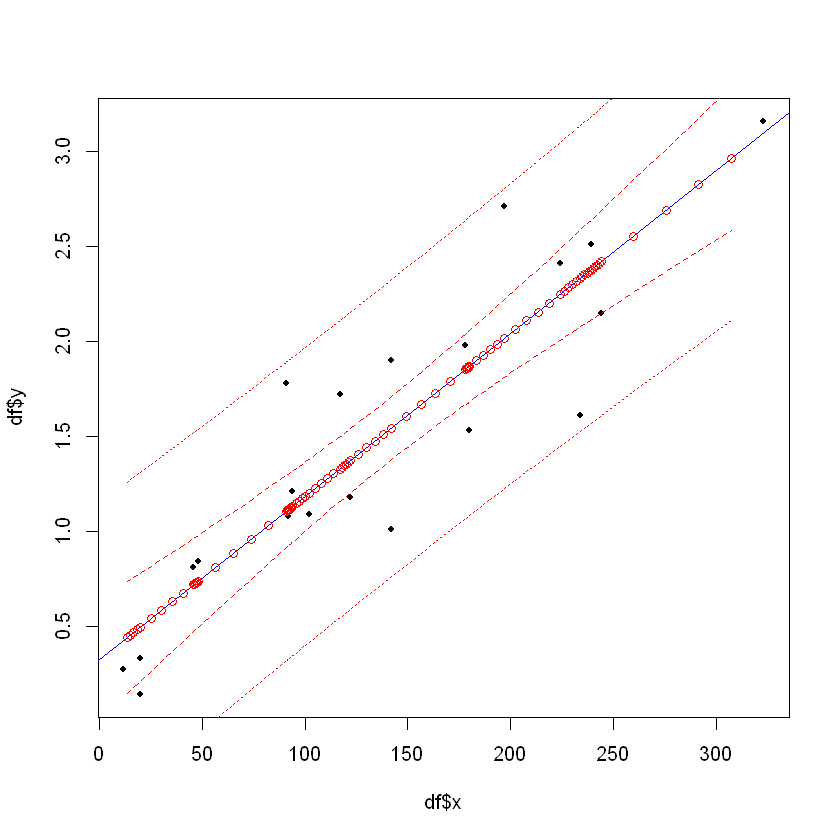

In [7]:
plot(df$x,df$y,pch=20)
abline(model1,col="blue")
points(percentiles,pred_c[,1],pch=1,col="red")
lines(percentiles,pred_c[,2],col="red",lty=2)
lines(percentiles,pred_c[,3],col="red",lty=2)
lines(percentiles,pred_p[,2],col="red",lty=3)
lines(percentiles,pred_p[,3],col="red",lty=3)

To show that the interval is wider on both sides and narrow in the center, I use following code to calculate the interval widths and then plot them.

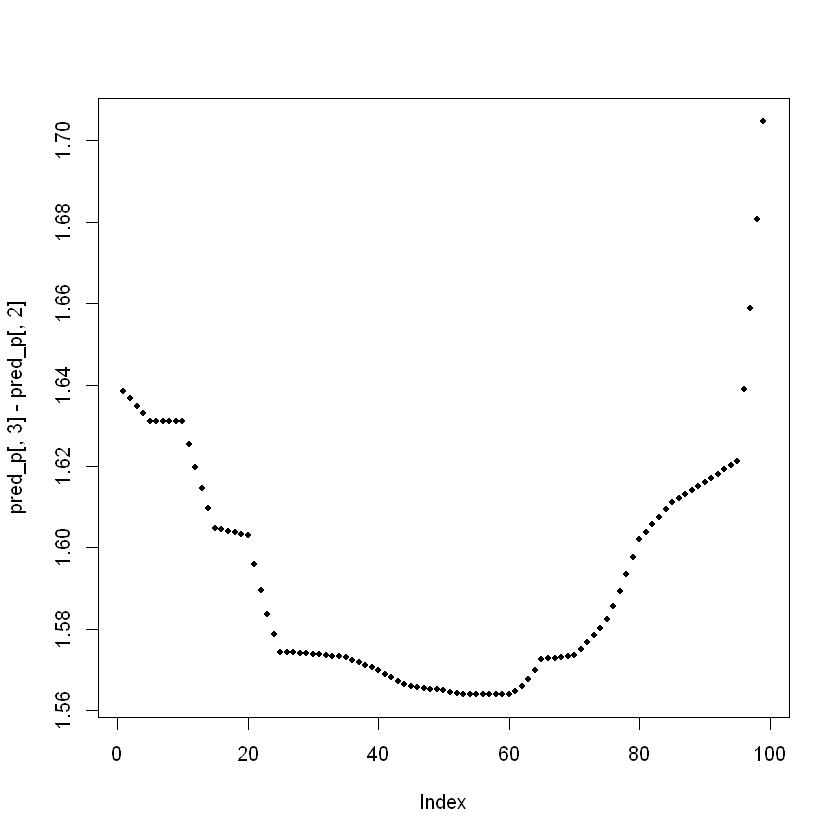

In [8]:
plot(pred_p[,3]-pred_p[,2], pch=20)

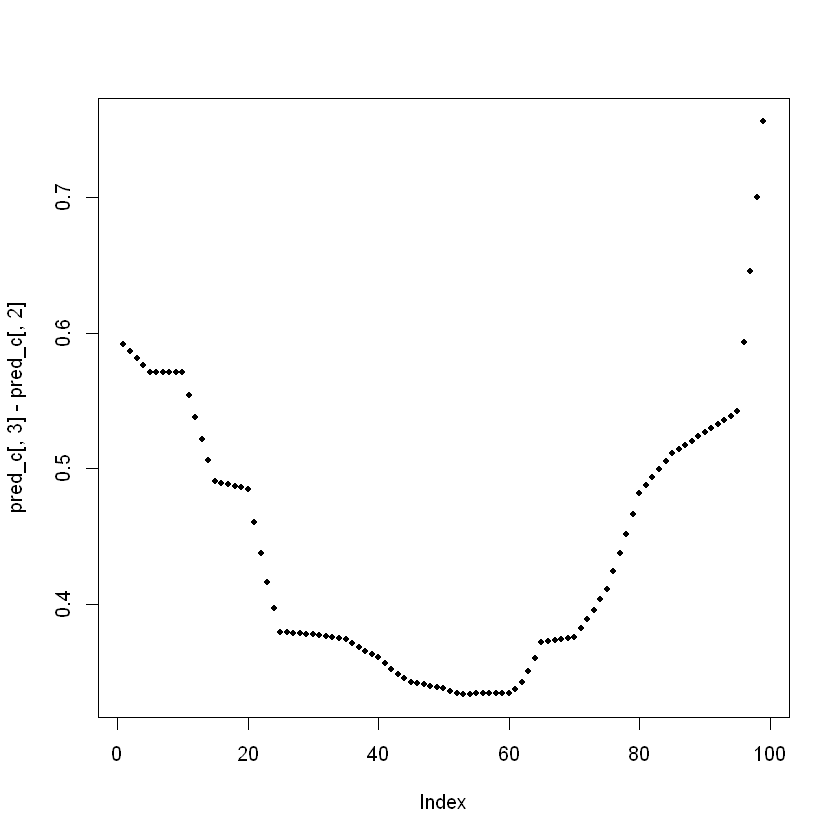

In [9]:
plot(pred_c[,3]-pred_c[,2], pch=20)

### 3.5.  Making prediction at what range of values of SO2 would be considered extrapolation?  Is it OK to do extrapolation in this case?
### *Answer:*
Making prediction beyond the range of the observed covariates would be considered extrapolation. It's not OK to do so because we do not know the relationship outside of the range of observed data.


### 4. Repeat the same questions (1-3) for the date set bus.csv. Description: Cross-sectional analysis of 24 British bus companies (1951). Use response variable = Expenses per car mile (pence), covariate = Car miles per year (1000s).
### *Answer:*
#### (1) I use the following code to load bus.csv. I also use x and y to indicate covariate and reesponse variable.

In [10]:
bus = read.csv('bus.csv')
names(bus) = c('y', 'x', 'Percent of Double Deckers in fleet', 'Percent of fleet on fuel oil', 'Receipts per car mile (pence)')
head(bus)

y,x,Percent of Double Deckers in fleet,Percent of fleet on fuel oil,Receipts per car mile (pence)
19.76,6235,100.00,100.00,25.10
17.85,46230,43.67,84.53,19.23
19.96,7360,65.51,81.57,21.42
16.80,28715,45.16,93.33,18.11
18.20,21934,49.20,83.07,19.24
16.71,1337,74.84,94.99,19.31


#### (2) Obtain R^2. This means the  R^2  for the fitted linear regression to the rocket propellant data set is 0.1583, which means 15.83% of the variation in y can be explained by the variation in x.

In [11]:
model2 = lm(y~x, data=bus)
summary(model2)$r.square

[1] 0.1582641

#### (3.1) I use the following code to perform hypothesis tests for each coefficient, obtain p values. 
#### a. For hypothesis testing for slope, the null hypothesis is H0:β1=0 which means the covariate should not influence the response variable. As we can see the p-value for the slope is 0.0542 which is larger than 5%, we say the p-value isn't significant. Therefore, we conclude we have a zero slope and there is no significant linear relationship between y and x.
#### b. For hypothesis testing for intercept, the null hypothesis is H0:β0=0. As we can see the p-value for the intercept is \<2e-16 which is smaller than 5%. Therefore, we conclude we have a significant nonzero intercept.

In [12]:
summary(model2)


Call:
lm(formula = y ~ x, data = bus)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0123 -0.9417 -0.1894  0.8993  2.6176 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.878e+01  4.075e-01  46.085   <2e-16 ***
x           -4.450e-05  2.188e-05  -2.034   0.0542 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.347 on 22 degrees of freedom
Multiple R-squared:  0.1583,	Adjusted R-squared:   0.12 
F-statistic: 4.136 on 1 and 22 DF,  p-value: 0.0542


#### (3.2) I use the following code to compute interval estimation with confidence of 95% for coefficients. As we can see given the confidence of 95%, the interval estimation for intercept is between 17.9 and 19.6 and the interval estimation for slope is between -9e-5 and 9e-7 which is very close to zero slope.

In [13]:
confint(model2,level=0.95)

,2.5 %,97.5 %
(Intercept),1.793660e+01,1.962700e+01
x,-8.987441e-05,8.761294e-07


#### (3.3) I use the following code to make prediction of the response variable at the 1st, 2nd, 3rd, …., 99th percentiles of the covariate, and obtain their prediction intervals with the confidence of 95%(two types of the intervals).

In [14]:
percentiles = quantile(bus$x, probs = seq(0.01, 0.99, by= 0.01))
pred_p = predict(model2, newdata=data.frame(x=percentiles), interval=c("prediction"), level=0.95, type="response")
pred_c = predict(model2, newdata=data.frame(x=percentiles), interval=c("confidence"), level=0.95, type="response")
head(pred_p)
head(pred_c)

,fit,lwr,upr
1%,18.73484,15.82603,21.64364
2%,18.73362,15.82506,21.64218
3%,18.73240,15.82409,21.64072
4%,18.73119,15.82312,21.63925
5%,18.72949,15.82176,21.63722
6%,18.72755,15.82021,21.63489


,fit,lwr,upr
1%,18.73484,17.92434,19.54534
2%,18.73362,17.92401,19.54324
3%,18.73240,17.92367,19.54114
4%,18.73119,17.92333,19.53904
5%,18.72949,17.92286,19.53613
6%,18.72755,17.92232,19.53278


In [15]:
tail(pred_p)
tail(pred_c)

,fit,lwr,upr
94%,17.02078,13.93814,20.10341
95%,16.84152,13.68486,19.99817
96%,16.72183,13.51092,19.93275
97%,16.71386,13.49920,19.92853
98%,16.70589,13.48746,19.92432
99%,16.69791,13.47571,19.92012


,fit,lwr,upr
94%,17.02078,15.71755,18.32401
95%,16.84152,15.37175,18.31129
96%,16.72183,15.13888,18.30479
97%,16.71386,15.12332,18.30441
98%,16.70589,15.10775,18.30402
99%,16.69791,15.09218,18.30365


#### (3.4) I use the following code to plot data points, the regression line, the predictions and its intervals (two types). Then I plot the interval widths of both types to show that the interval is wider on two sides and narrower in the middle.

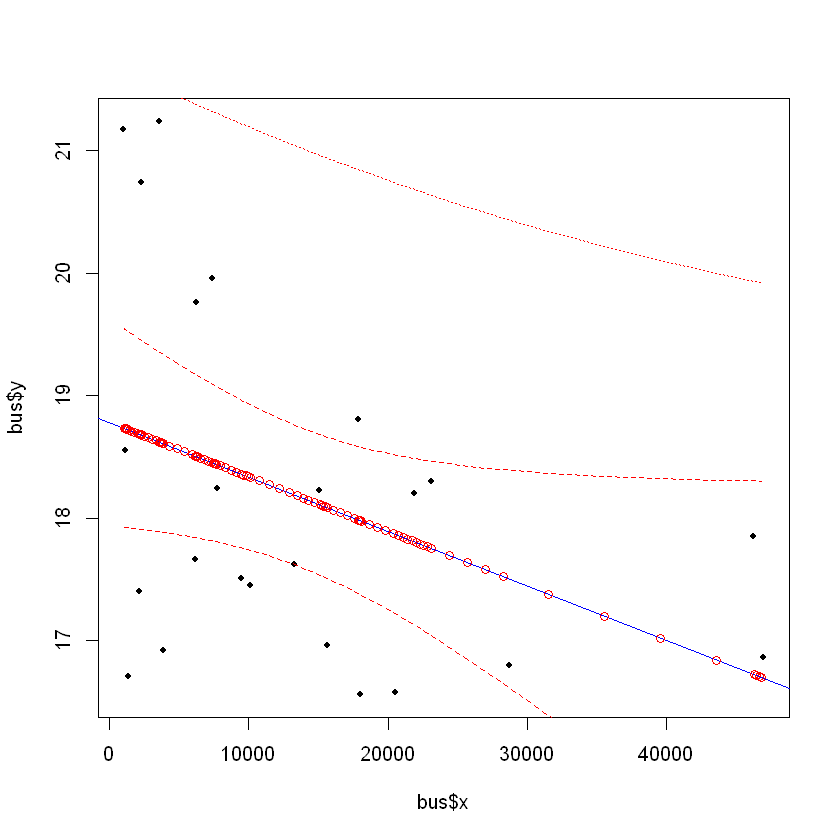

In [16]:
plot(bus$x,bus$y,pch=20)
abline(model2,col="blue")
points(percentiles,pred_c[,1],pch=1,col="red")
lines(percentiles,pred_c[,2],col="red",lty=2)
lines(percentiles,pred_c[,3],col="red",lty=2)
lines(percentiles,pred_p[,2],col="red",lty=3)
lines(percentiles,pred_p[,3],col="red",lty=3)

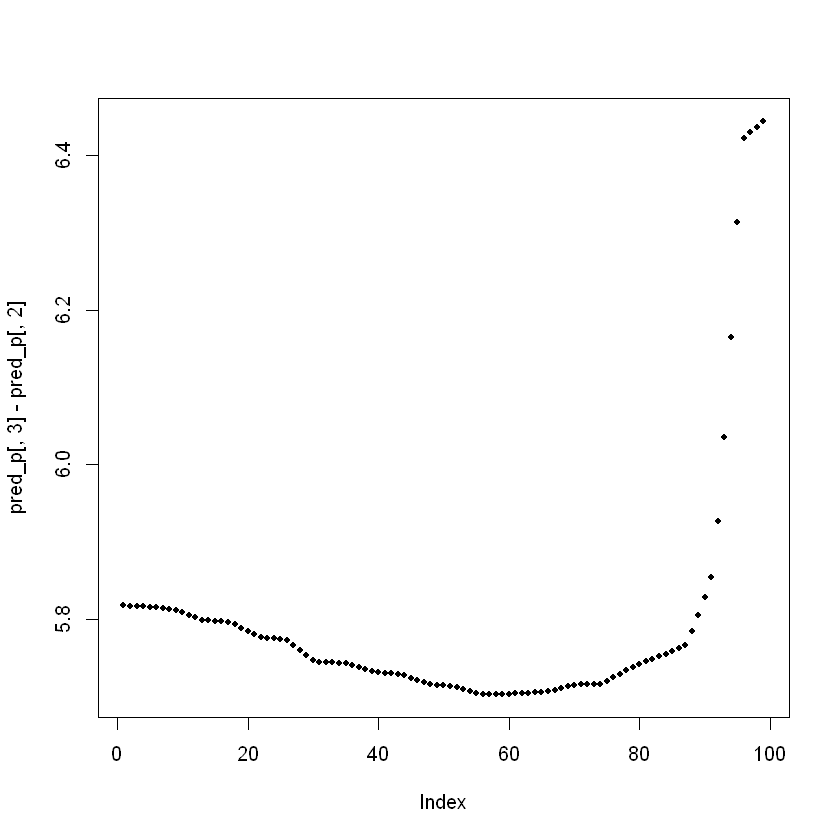

In [17]:
plot(pred_p[,3]-pred_p[,2], pch=20)

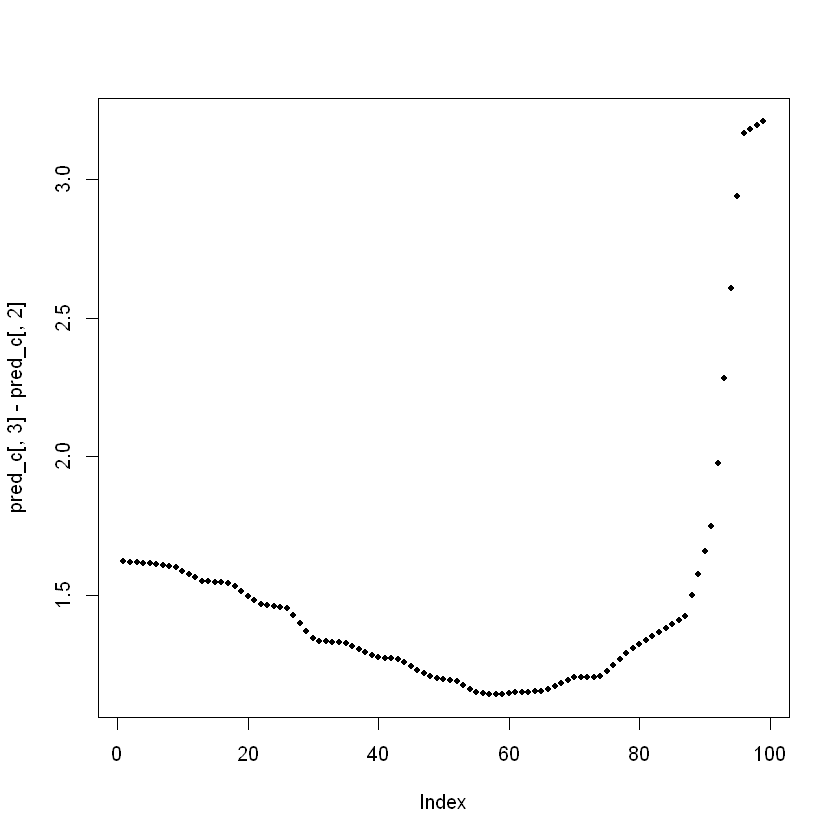

In [18]:
plot(pred_c[,3]-pred_c[,2], pch=20)

#### (3.5) Making prediction beyond the range of the observed covariates would be considered extrapolation. It's not OK to do so because we do not know the relationship outside of the range of observed data.